Maximum accuracy achieved: 0.6 at k = 1


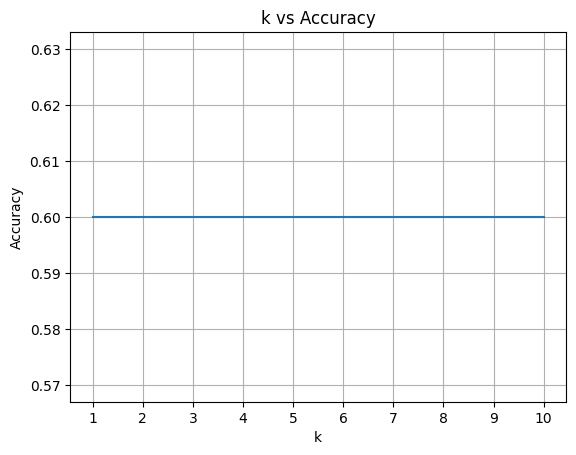

Accuracy: 0.6
Confusion Matrix:
yes {'yes': 3, 'no': 0}
no {'yes': 2, 'no': 0}


In [1]:
# Step 1: Load and preprocess dataset
def load_dataset():
    dataset = [
        ['sunny', 'hot', 'high', 'weak', 'no'],
        ['sunny', 'hot', 'high', 'strong', 'no'],
        ['overcast', 'hot', 'high', 'weak', 'yes'],
        ['rain', 'mild', 'high', 'weak', 'yes'],
        ['rain', 'cool', 'normal', 'weak', 'yes'],
        ['rain', 'cool', 'normal', 'strong', 'no'],
        ['overcast', 'cool', 'normal', 'strong', 'yes'],
        ['sunny', 'mild', 'high', 'weak', 'no'],
        ['sunny', 'cool', 'normal', 'weak', 'yes'],
        ['rain', 'mild', 'normal', 'weak', 'yes'],
        ['sunny', 'mild', 'normal', 'strong', 'yes'],
        ['overcast', 'mild', 'high', 'strong', 'yes'],
        ['overcast', 'hot', 'normal', 'weak', 'yes'],
        ['rain', 'mild', 'high', 'strong', 'no'],
        ['rain', 'cool', 'normal', 'strong', 'yes'],
        ['sunny', 'mild', 'normal', 'strong', 'no']
    ]
    return dataset

# Step 2: Split dataset into train and test sets
def train_test_split(dataset, split_ratio=0.7):
    split_index = int(len(dataset) * split_ratio)
    train_set = dataset[:split_index]
    test_set = dataset[split_index:]
    return train_set, test_set

# Step 3: Implement K-NN algorithm
def euclidean_distance(instance1, instance2):
    distance = 0
    for i in range(len(instance1)-1):
        if instance1[i] != instance2[i]:
            distance += 1
    return distance

def get_neighbors(train_set, test_instance, k):
    distances = []
    for train_instance in train_set:
        dist = euclidean_distance(train_instance[:-1], test_instance)
        distances.append((train_instance, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = [distance[0] for distance in distances[:k]]
    return neighbors

def predict_classification(neighbors):
    votes = {}
    for neighbor in neighbors:
        answer = neighbor[-1]
        if answer in votes:
            votes[answer] += 1
        else:
            votes[answer] = 1
    sorted_votes = sorted(votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

def k_nearest_neighbors(train_set, test_set, k):
    predictions = []
    for test_instance in test_set:
        neighbors = get_neighbors(train_set, test_instance, k)
        result = predict_classification(neighbors)
        predictions.append(result)
    return predictions

# Step 4: Calculate accuracy and confusion matrix
def calculate_accuracy(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))

def confusion_matrix(actual, predicted):
    classes = list(set(actual))
    matrix = {true_class: {pred_class: 0 for pred_class in classes} for true_class in classes}
    for i in range(len(actual)):
        true_class = actual[i]
        pred_class = predicted[i]
        matrix[true_class][pred_class] += 1
    return matrix

# Step 5: Examine the effect of different values of K on accuracy
def plot_k_vs_accuracy(train_set, test_set, max_k=10):
    accuracies = []
    for k in range(1, max_k+1):
        predictions = k_nearest_neighbors(train_set, test_set, k)
        actual = [instance[-1] for instance in test_set]
        accuracy = calculate_accuracy(actual, predictions)
        accuracies.append((k, accuracy))
    return accuracies

# Load dataset
dataset = load_dataset()
train_set, test_set = train_test_split(dataset, split_ratio=0.7)

# Test model using test set
max_k = 10
accuracies = plot_k_vs_accuracy(train_set, test_set, max_k)

# Find maximum accuracy and corresponding k value
max_accuracy = max(accuracies, key=lambda x: x[1])
print("Maximum accuracy achieved:", max_accuracy[1], "at k =", max_accuracy[0])

# Plot k vs accuracy curve
import matplotlib.pyplot as plt

ks, accs = zip(*accuracies)
plt.plot(ks, accs)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.xticks(range(1, max_k+1))
plt.grid(True)
plt.show()

# Calculate accuracy and confusion matrix for the best k
best_k = max_accuracy[0]
predictions = k_nearest_neighbors(train_set, test_set, best_k)
actual = [instance[-1] for instance in test_set]
accuracy = calculate_accuracy(actual, predictions)
conf_matrix = confusion_matrix(actual, predictions)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
for true_class, pred_classes in conf_matrix.items():
    print(true_class, pred_classes)


